# Importing libraries 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset 

In [56]:
df=pd.read_csv('train.csv')

In [57]:
df.head()

,ID,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,ID0002,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
1,ID0004,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
2,ID0005,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
3,ID0006,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
4,ID0009,33,1,2,4,8,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df['Purchase'].value_counts()

0    2454
1     164
Name: Purchase, dtype: int64

In [59]:
df['MINKM30'].value_counts()

0    571
2    468
3    463
1    300
4    289
5    267
6    134
7     81
8     23
9     22
Name: MINKM30, dtype: int64

In [60]:
# Separate input features (X) and target variable (y)
y = df.Purchase
X = df.drop('Purchase', axis=1)
X=X.iloc[:,1:]

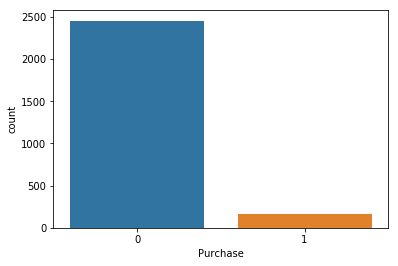

In [45]:
# Now lets check the class distributions
sns.countplot("Purchase",data=df)

In [61]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
y = df_upsampled.Purchase
X = df_upsampled.drop('Purchase', axis=1)
X=X.iloc[:,1:]

# Up sampling (Not required for SVM)

In [63]:
from sklearn.utils import resample

In [47]:
# Separate majority and minority classes
df_majority = df[df.Purchase==0]
df_minority = df[df.Purchase==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2454) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Purchase.value_counts()

1    2454
0    2454
Name: Purchase, dtype: int64

## Coming back 

In [49]:
X.shape

(4908, 85)

In [50]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0, 3, 4])
X = onehotencoder.fit_transform(X).toarray()

In [51]:
X_indices = np.arange(X.shape[-1])
print(X_indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137]


In [52]:
X.shape

(4908, 138)

In [54]:
X_train.shape

(3926, 138)

# Feature Selection 

## Randomized Logistic Regression

In [11]:
from sklearn.linear_model import RandomizedLogisticRegression
randomlr = RandomizedLogisticRegression()
X_train = randomlr.fit_transform(X_train,y_train)
X_test = randomlr.transform(X_test)

C:\Users\Jaadugar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
X_train.shape

(2094, 4)

# Modeling

In [13]:
X_train.shape

(2094, 4)

In [14]:
df.columns

Index(['ID', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER', 'AF

In [15]:
df.head()

,ID,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,ID0002,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
1,ID0004,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
2,ID0005,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
3,ID0006,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
4,ID0009,33,1,2,4,8,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0


# Feature Extraction

## Applying Linear Discriminant Analysis 

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Dealing with Imbalance dataset
We have tried various methods like
1.Upsampling
2.Downsampling 
3.Tree based method .i.e.Random Forrest
4.Penalize Algorithms (Cost-Sensitive Training)
Among all Penalize Algorithms (Cost-Sensitive Training) performs well on this dataset. 

### SVM-(Works Best)

In [16]:
# Train model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', 
                class_weight='balanced', # penalize
                probability=True)

In [17]:
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### RandomForest 

In [120]:
from sklearn.ensemble import RandomForestClassifier
svm_classifier = RandomForestClassifier(n_estimators=200, oob_score=True,class_weight='balanced', n_jobs=2)
svm_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=2, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

### Adaboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
svm_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100)
svm_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [18]:
# Predict on training set
y_pred_svm = svm_classifier.predict(X_test)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[326 165]
 [ 11  22]]


In [20]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.704958486263
0.0546011928395


In [21]:
# Is our model still predicting just one class?
print( np.unique( y_pred_svm ) )

[0 1]


In [22]:
np.count_nonzero(y_pred_svm)

187

In [23]:
# How's our accuracy?
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, y_pred_svm) )

0.664122137405


# Predicting the Test Data

In [24]:
df_test=pd.read_csv('test.csv')

In [25]:
X_test=df_test.iloc[:,1:].values

In [26]:
X_test.shape

(2553, 85)

In [27]:
X_test = onehotencoder.fit_transform(X_test).toarray()

In [28]:
X_test = randomlr.transform(X_test)

In [29]:
#X_test = lda.transform(X_test)

In [30]:
X_test.shape

(2553, 4)

In [31]:
y_pred = svm_classifier.predict(X_test)

In [32]:
print( np.unique(y_pred ))

[0 1]


In [33]:
np.count_nonzero(y_pred)

884

# Saving the file

In [34]:
#Saving the file
result=pd.read_csv('update.csv')
result['Purchase']=y_pred

In [35]:
result.to_csv('svm.csv',index=False)